# Transformadores, ¿qué pueden hacer?

* Los Transformers son una arquitectura de red neuronal.

* Pensemos en ellos como el diseño o el plano de cómo construir un tipo particular de modelo de lenguaje LLM

* Es el marco dentro del cual se crea el modelo de lenguaje.


## Pipelines disponibles

Algunos de los pipelines disponibles son:

* feature-extraction (obtener la representación vectorial de un texto)
* fill-mask
* ner (reconocimiento de entidades nombradas)
* question-answering
* sentiment-analysis
* summarization
* text-generation
* translation
* zero-shot-classification

### Temas a ver



* Cómo usar la función pipeline() para resolver tareas de PLN como la generación y clasificación de texto
* Sobre la arquitectura de los Transformadores
* Cómo distinguir entre las arquitecturas de codificador, decodificador y codificador-decofidicador, además de sus casos de uso


---


* How to use the pipeline() function to solve NLP tasks such as text generation and classification
* About the Transformer architecture
* How to distinguish between encoder, decoder, and encoder-decoder architectures and use cases

In [ ]:
!pip install transformers

### Code

Install the Transformers, Datasets, and Evaluate libraries to run this notebook.

Por defecto, este ***pipeline*** selecciona un modelo particular preentrenado que ha sido ajustado para el análisis de sentimientos en Inglés. El modelo se descarga y se almacena en el caché.

In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torc

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

[{'label': 'POSITIVE', 'score': 0.9598047137260437}]

In [ ]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598047137260437},
 {'label': 'NEGATIVE', 'score': 0.9994558095932007}]

Con el pipeline de "zero-shot-classification", podremos realizar una clasificación de nuestros textos con respecto labels que nosotros definamos.

Permite que especifiques qué etiquetas usar para la clasificación, para que no dependas de las etiquetas del modelo preentrenado

Este pipeline se llama zero-shot porque no necesitas ajustar el modelo con tus datos para usarlo. ¡Puede devolver directamente puntajes de probabilidad para cualquier lista de de etiquetas que escojas!

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445963859558105, 0.111976258456707, 0.043427448719739914]}

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("In this course, we will teach you how to")

[{'generated_text': 'In this course, we will teach you how to understand and use '
                    'data flow and data interchange when handling user data. We '
                    'will be working with one or more of the most commonly used '
                    'data flows — data flows of various types, as seen by the '
                    'HTTP'}]

Aquí estams usando un modelo destilado de gpt echo por HF

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

[{'generated_text': 'In this course, we will teach you how to manipulate the world and '
                    'move your mental and physical capabilities to your advantage.'},
 {'generated_text': 'In this course, we will teach you how to become an expert and '
                    'practice realtime, and with a hands on experience on both real '
                    'time and real'}]

El pipeline fill-mask de Transformers está pensado para completar palabras o tokens concretos que marques con un token especial (por ejemplo [MASK])

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("This course will teach you all about <mask> models.", top_k=2)

[{'sequence': 'This course will teach you all about mathematical models.',
  'score': 0.19619831442832947,
  'token': 30412,
  'token_str': ' mathematical'},
 {'sequence': 'This course will teach you all about computational models.',
  'score': 0.04052725434303284,
  'token': 38163,
  'token_str': ' computational'}]

El pipiline "ner" (named entity recognition), nos permite identificar las entidades de una oración (clasificarlo por etiquetas).

Por defecto, Hugging Face carga un modelo ***finetuned***  sobre el dataset CoNLL-2003, que define:

4 tipos de entidad semántica (los “grupos” que ves con grouped_entities=True):

* PER (persona)

* ORG (organización)

* LOC (localización)

* MISC (miscelánea: eventos, productos, obras, etc.)


In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Sylvain and I work at Hugging Face in Brooklyn.")

[{'entity_group': 'PER', 'score': 0.99816, 'word': 'Sylvain', 'start': 11, 'end': 18}, 
 {'entity_group': 'ORG', 'score': 0.97960, 'word': 'Hugging Face', 'start': 33, 'end': 45}, 
 {'entity_group': 'LOC', 'score': 0.99321, 'word': 'Brooklyn', 'start': 49, 'end': 57}
]

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

{'score': 0.6385916471481323, 'start': 33, 'end': 45, 'answer': 'Hugging Face'}

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of
    graduates in traditional engineering disciplines such as mechanical, civil,
    electrical, chemical, and aeronautical engineering declined, but in most of
    the premier American universities engineering curricula now concentrate on
    and encourage largely the study of engineering science. As a result, there
    are declining offerings in engineering subjects dealing with infrastructure,
    the environment, and related issues, and greater concentration on high
    technology subjects, largely supporting increasingly complex scientific
    developments. While the latter is important, it should not be at the expense
    of more traditional engineering.

    Rapidly developing economies such as China and India, as well as other
    industrial countries in Europe and Asia, continue to encourage and advance
    the teaching of engineering. Both China and India, respectively, graduate
    six and eight times as many traditional engineers as does the United States.
    Other industrial countries at minimum maintain their output, while America
    suffers an increasingly serious decline in the number of engineering graduates
    and a lack of well-educated engineers.
"""
)

[{'summary_text': ' America has changed dramatically during recent years . The '
                  'number of engineering graduates in the U.S. has declined in '
                  'traditional engineering disciplines such as mechanical, civil '
                  ', electrical, chemical, and aeronautical engineering . Rapidly '
                  'developing economies such as China and India, as well as other '
                  'industrial countries in Europe and Asia, continue to encourage '
                  'and advance engineering .'}]

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]

## Podemos seleccionar algún modelo del Hugging Face Hub

Aquí podremos seleccionar el modelo dependiendo el tipo de task que queremos realizar

Hugging Face Hub= https://huggingface.co/models

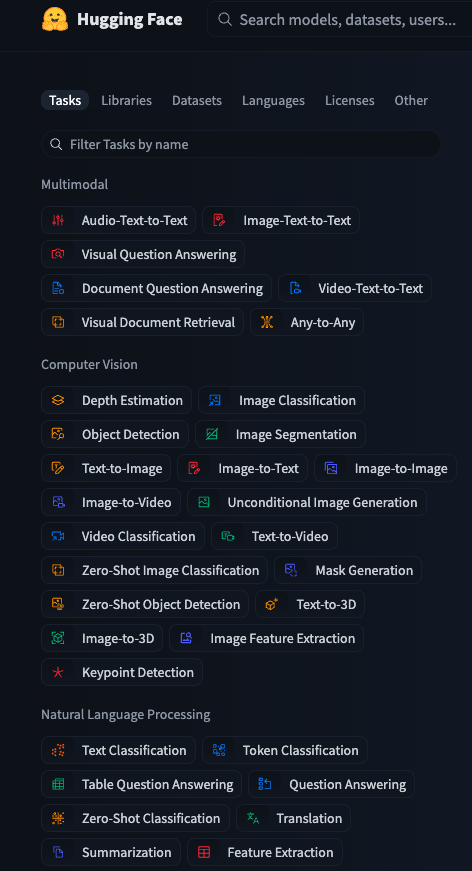

## Ejemplo donde se usa un modelo del HF Hub

Este modelo es en español, acomparación del modelo predeterminado que trae HF


modelo usado: https://huggingface.co/mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es

In [ ]:
from transformers import pipeline

question = pipeline("question-answering", model = "mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es")
question (question='donde trabajo?', context= 'soy edu y trabajo en ibm' )

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

Some weights of the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/135 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/242k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


{'score': 0.9656603336334229, 'start': 21, 'end': 24, 'answer': 'ibm'}